## 1. Preprocessing

In [34]:
!pip install tensorflow

In [82]:
#uesd libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout
from keras.layers import *

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU


In [36]:

df_1=pd.read_csv("/EGX_DLY_COMI, 1D.csv")
df_2=pd.read_csv("/EGX_DLY_EGX30, 1D.csv")
df_3=pd.read_csv("/EGX_DLY_EMFD, 1D.csv")
df_4=pd.read_csv("/EGX_DLY_ISPH, 1D.csv")

#merge the datasets
df_merged=pd.concat(
    map(pd.read_csv, ["/EGX_DLY_COMI, 1D.csv","/EGX_DLY_EGX30, 1D.csv","/EGX_DLY_EMFD, 1D.csv","/EGX_DLY_ISPH, 1D.csv"]), ignore_index=True)

In [ ]:
df_1

,time,open,high,low,close
0,989910000,0.839019,0.839019,0.827202,0.831220
1,989996400,0.827202,0.836419,0.823184,0.826020
2,990082800,0.827202,0.827202,0.820111,0.824366
3,990342000,0.815621,0.821293,0.815385,0.816566
4,990428400,0.813257,0.850836,0.809476,0.831456
...,...,...,...,...,...
5524,1707638400,80.489998,80.500000,78.019997,79.550003
5525,1707724800,79.550003,84.500000,78.750000,83.120003
5526,1707811200,83.120003,83.120003,80.019997,81.059998
5527,1707897600,81.059998,82.400002,80.529999,81.989998


In [ ]:
df_2

,time,open,high,low,close
0,1256025600,7131.700195,7157.509766,7123.200195,7145.149902
1,1256112000,7139.060059,7139.290039,7062.069824,7062.089844
2,1256198400,7042.229980,7101.700195,7002.209961,7101.700195
3,1256457600,7133.209961,7207.540039,7131.310059,7188.750000
4,1256544000,7177.479980,7261.759766,7174.229980,7249.549805
...,...,...,...,...,...
3462,1707638400,28439.000000,28622.000000,27972.301000,28199.000000
3463,1707724800,28327.900000,28690.500000,27681.199000,28494.699000
3464,1707811200,28545.500000,28839.400000,28306.600000,28604.500000
3465,1707897600,28633.699000,28973.400000,28601.500000,28875.000000


In [ ]:
df_merged.shape
#the whole data is about 12640 records and 5 features

(12640, 5)

In [ ]:
df_merged.info()  #to find the data type of each column

"""
time is needed to be in a datetime form not int64

"""


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12640 entries, 0 to 12639
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    12640 non-null  int64  
 1   open    12640 non-null  float64
 2   high    12640 non-null  float64
 3   low     12640 non-null  float64
 4   close   12640 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 493.9 KB


'\ntime is needed to be in a datetime form not int64\n\n'

In [37]:

df_merged['time']=pd.to_datetime(df_merged['time'], unit='s')

In [38]:
df_merged

,time,open,high,low,close
0,2001-05-15 07:00:00,0.839019,0.839019,0.827202,0.831220
1,2001-05-16 07:00:00,0.827202,0.836419,0.823184,0.826020
2,2001-05-17 07:00:00,0.827202,0.827202,0.820111,0.824366
3,2001-05-20 07:00:00,0.815621,0.821293,0.815385,0.816566
4,2001-05-21 07:00:00,0.813257,0.850836,0.809476,0.831456
...,...,...,...,...,...
12635,2024-02-11 08:00:00,3.430000,3.520000,3.330000,3.390000
12636,2024-02-12 08:00:00,3.390000,3.460000,3.330000,3.410000
12637,2024-02-13 08:00:00,3.410000,4.080000,3.400000,3.810000
12638,2024-02-14 08:00:00,3.810000,3.900000,3.800000,3.820000


In [ ]:
#some statistics insights of the data
df_merged.describe()

,time,open,high,low,close
count,12640,12640.000000,12640.000000,12640.000000,12640.000000
mean,2016-01-24 23:53:01.044303872,2825.761692,2846.906060,2808.007666,2827.060045
min,2001-05-15 07:00:00,0.602676,0.602676,0.600312,0.602203
25%,2012-02-14 02:00:00,3.050000,3.110000,2.990000,3.050000
50%,2017-07-10 08:00:00,7.634414,7.735757,7.483705,7.628033
75%,2020-11-22 14:00:00,5116.934937,5146.237304,5073.094849,5116.734985
max,2024-02-15 08:00:00,30431.301000,30696.000000,29193.900000,30347.301000
std,NaN,5150.901450,5192.226783,5116.915050,5154.221037


In [ ]:
#check the duplicated
df_merged.duplicated().any()

False

In [ ]:
#check the nulls
df_merged.isnull().sum()

time     0
open     0
high     0
low      0
close    0
dtype: int64

In [ ]:
df_merged['time'].value_counts()

#differnet data is captured in the same time

time
2020-06-18 08:00:00    4
2020-01-20 08:00:00    4
2020-01-06 08:00:00    4
2020-01-08 08:00:00    4
2020-01-09 08:00:00    4
                      ..
2007-01-08 08:00:00    1
2007-01-09 08:00:00    1
2007-01-10 08:00:00    1
2007-01-11 08:00:00    1
2012-10-28 08:00:00    1
Name: count, Length: 5553, dtype: int64

In [ ]:
#sort the data by date format
df_merged.sort_values(by='time', inplace=True)


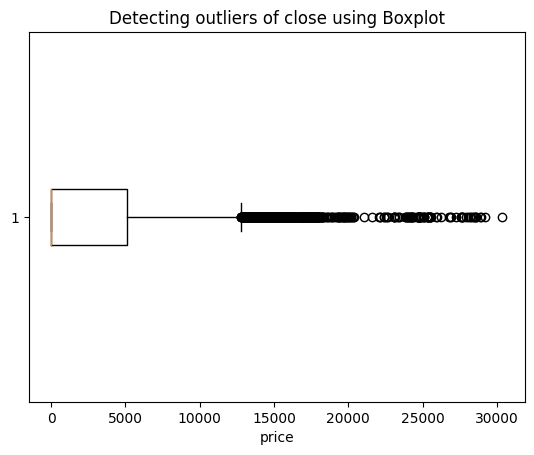

<ipython-input-39-c8d6503711d5>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['close'])  # Adjust the number of bins as needed


Text(0.5, 1.0, 'Distribution of close Price')

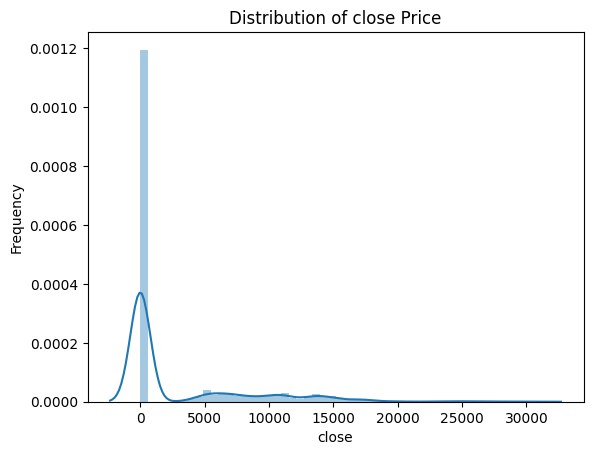

In [39]:
#handling ouliers of the data

# 1. detect the outliers of the target price (Close)


plt.boxplot(df_merged['close'], vert=False)
plt.title("Detecting outliers of close using Boxplot")
plt.xlabel('price')
plt.show()

sns.distplot(df_merged['close'])  # Adjust the number of bins as needed
plt.xlabel('close')
plt.ylabel('Frequency')
plt.title('Distribution of close Price')    # we found that the close is a right skewed


<ipython-input-40-caf921abbee2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['open'])  # Adjust the number of bins as needed


Text(0.5, 1.0, 'Distribution of open Price')

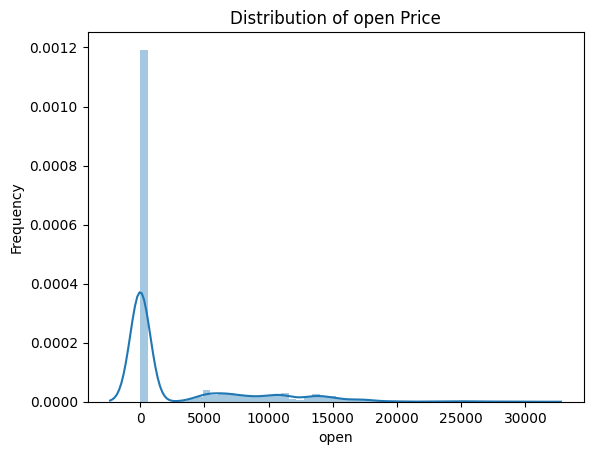

In [40]:
sns.distplot(df_merged['open'])  # Adjust the number of bins as needed
plt.xlabel('open')
plt.ylabel('Frequency')
plt.title('Distribution of open Price')    # we found that the open is a right skewed

<ipython-input-29-211fb7c039f7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['low'])  # Adjust the number of bins as needed


Text(0.5, 1.0, 'Distribution of low Price')

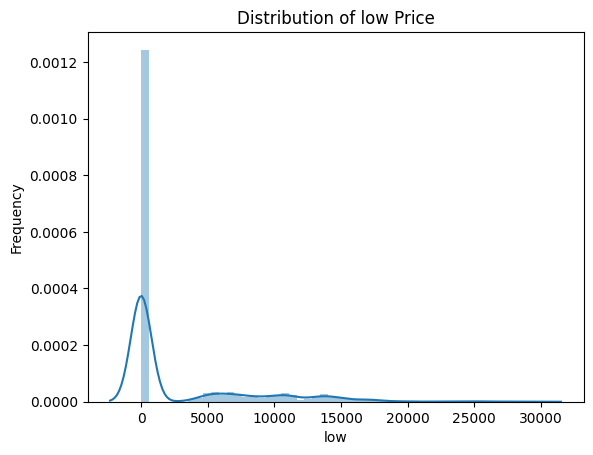

In [ ]:
sns.distplot(df_merged['low'])  # Adjust the number of bins as needed
plt.xlabel('low')
plt.ylabel('Frequency')
plt.title('Distribution of low Price')    # we found that the low price is a right skewed

<ipython-input-30-20382eb7a821>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['high'])  # Adjust the number of bins as needed


Text(0.5, 1.0, 'Distribution of high Price')

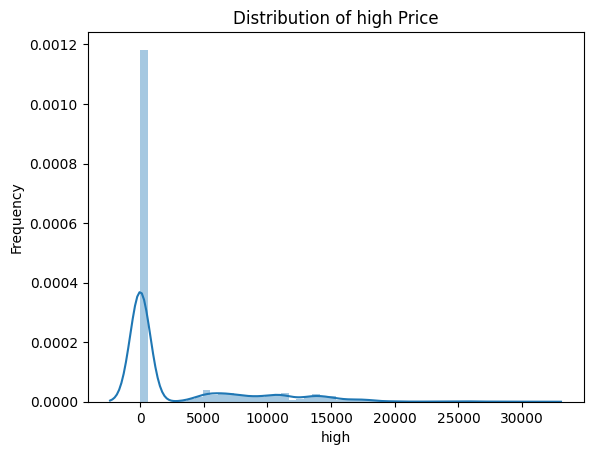

In [ ]:
sns.distplot(df_merged['high'])  # Adjust the number of bins as needed
plt.xlabel('high')
plt.ylabel('Frequency')
plt.title('Distribution of high Price')    # we found that the high price is a right skewed

In [55]:
copyy_df=df_merged.copy()

In [57]:
# 2. transformation of the distribution to handle the outliers instead of remove these data and losing important information


#function to log the prices
def logTr(column):
  copyy_df[column]=np.log1p(copyy_df[column])


#apply the trabsformation
logTr('close')
logTr('open')
logTr('low')
logTr('high')



In [59]:
copyy_df

,time,open,high,low,close
0,2001-05-15 07:00:00,0.609232,0.609232,0.602786,0.604982
1,2001-05-16 07:00:00,0.602786,0.607818,0.600584,0.602139
2,2001-05-17 07:00:00,0.602786,0.602786,0.598898,0.601232
3,2001-05-20 07:00:00,0.596427,0.599547,0.596297,0.596948
4,2001-05-21 07:00:00,0.595125,0.615637,0.593037,0.605111
...,...,...,...,...,...
12635,2024-02-11 08:00:00,1.488400,1.508512,1.465568,1.479329
12636,2024-02-12 08:00:00,1.479329,1.495149,1.465568,1.483875
12637,2024-02-13 08:00:00,1.483875,1.625311,1.481605,1.570697
12638,2024-02-14 08:00:00,1.570697,1.589235,1.568616,1.572774


In [61]:
copyy_df.set_index('time')

,open,high,low,close
time,,,,
2001-05-15 07:00:00,0.609232,0.609232,0.602786,0.604982
2001-05-16 07:00:00,0.602786,0.607818,0.600584,0.602139
2001-05-17 07:00:00,0.602786,0.602786,0.598898,0.601232
2001-05-20 07:00:00,0.596427,0.599547,0.596297,0.596948
2001-05-21 07:00:00,0.595125,0.615637,0.593037,0.605111
...,...,...,...,...
2024-02-11 08:00:00,1.488400,1.508512,1.465568,1.479329
2024-02-12 08:00:00,1.479329,1.495149,1.465568,1.483875
2024-02-13 08:00:00,1.483875,1.625311,1.481605,1.570697


In [62]:
# Scale the data to be normalized in a range from 0 to 1
min_max_scaler = MinMaxScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(copyy_df[col])),columns=[col])

    return df

cols=['open','high', 'low', 'close']

scaled_df=scaleColumns(copyy_df, cols)

scaled_df

,time,open,high,low,close
0,2001-05-15 07:00:00,0.013963,0.013951,0.013513,0.013565
1,2001-05-16 07:00:00,0.013309,0.013807,0.013289,0.013276
2,2001-05-17 07:00:00,0.013309,0.013297,0.013117,0.013184
3,2001-05-20 07:00:00,0.012663,0.012968,0.012852,0.012749
4,2001-05-21 07:00:00,0.012531,0.014600,0.012520,0.013578
...,...,...,...,...,...
12635,2024-02-11 08:00:00,0.103204,0.105153,0.101449,0.102339
12636,2024-02-12 08:00:00,0.102284,0.103798,0.101449,0.102801
12637,2024-02-13 08:00:00,0.102745,0.116999,0.103083,0.111616
12638,2024-02-14 08:00:00,0.111558,0.113340,0.111951,0.111827


## 2. Exploratory Data Analysis

In [64]:
#get the duration of the dataset

print("Starting date: ",df_merged.iloc[0][0])
print("Ending date: ", df_merged.iloc[-1][0])
print("Duration: ", df_merged.iloc[-1][0]-df_merged.iloc[0][0])

Starting date:  2001-05-15 07:00:00
Ending date:  2024-02-15 08:00:00
Duration:  8311 days 01:00:00


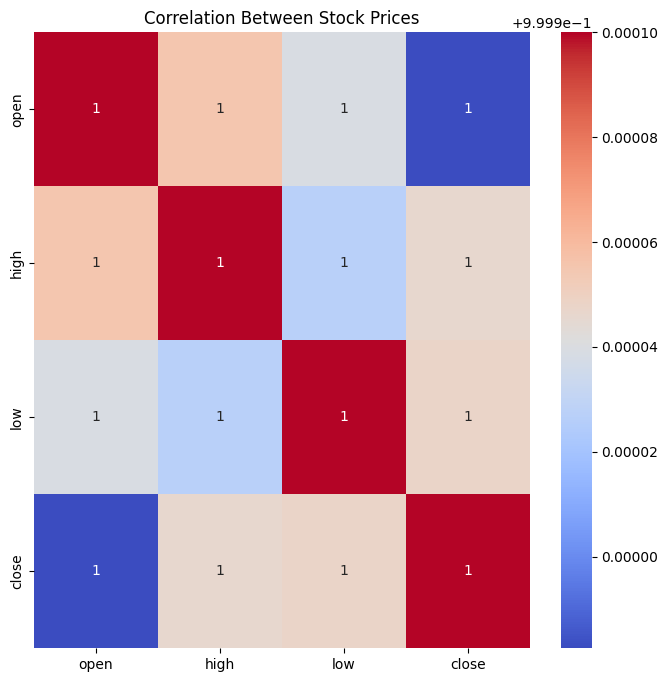

In [ ]:
# Create a heatmap of the correlation between stock prices
corr = df_merged[['open', 'high', 'low', 'close']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices')
plt.show()


*  what was the change in the price of the stock over the time ?

35717627.79146796


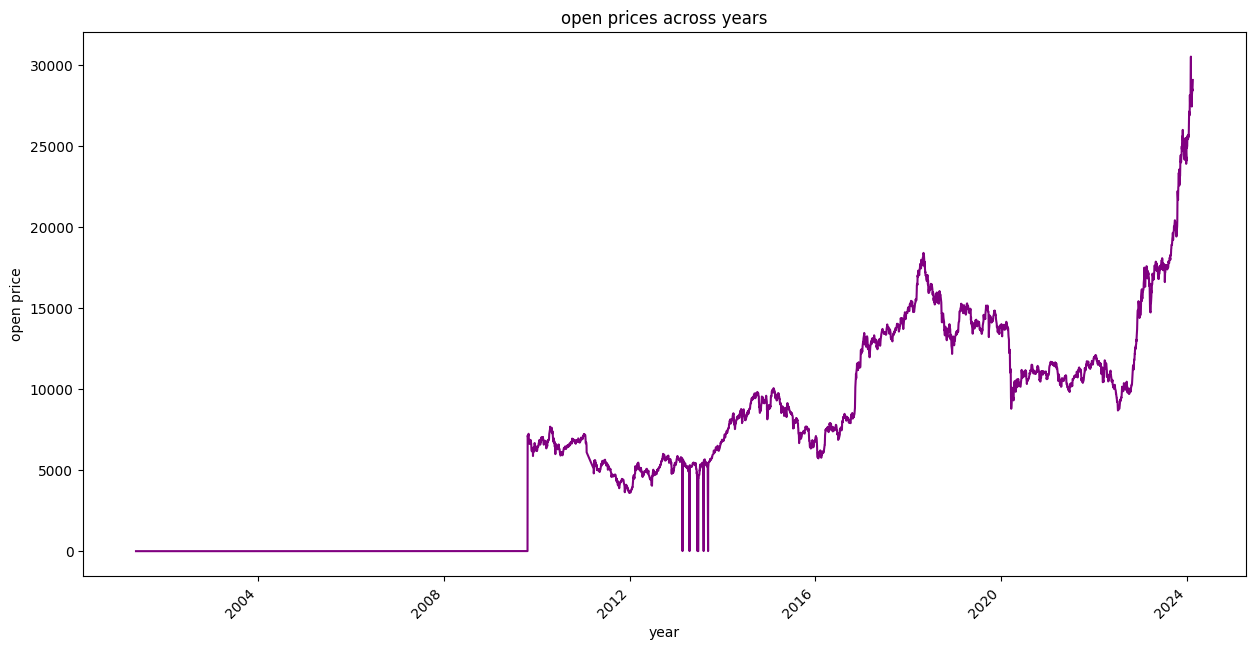

In [ ]:
open_time=df_merged.groupby('time')[['open']].sum()

#show the distibutions of open price across the years
open_time.plot( kind='line', rot=45, legend=None,
        title='open prices across years', xlabel='year',ylabel='open price' ,fontsize=10, figsize=(15,8),color='purple')
print(open_time['open'].sum())


35734038.97067195


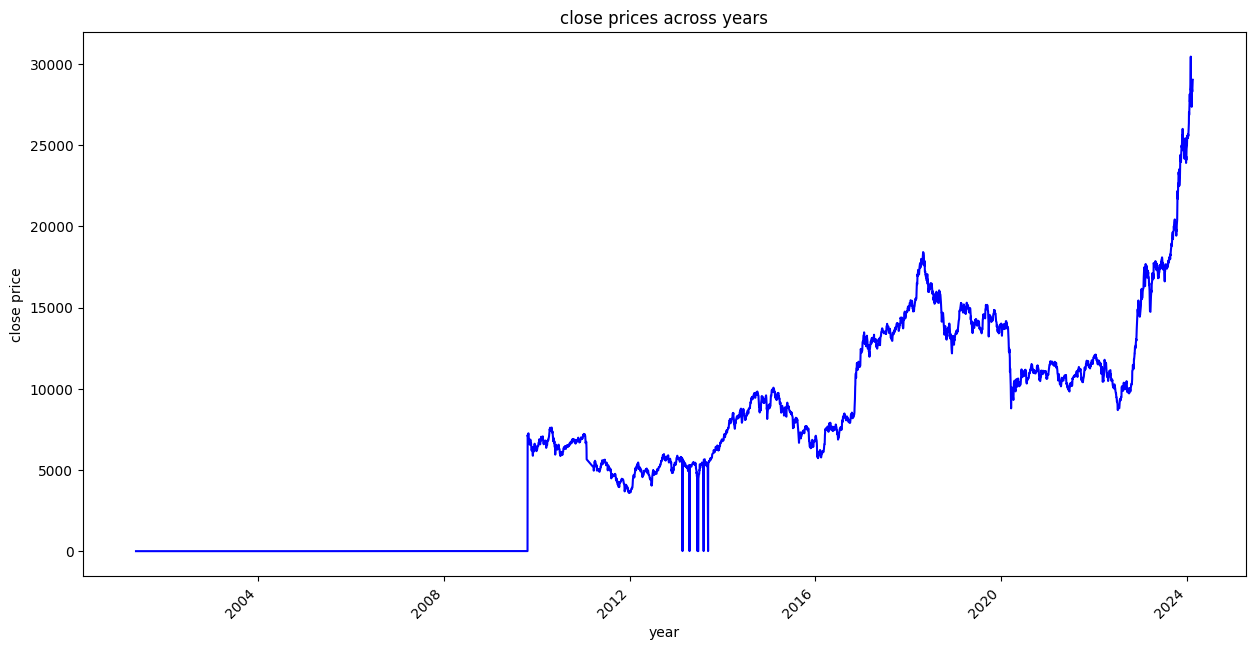

In [ ]:
close_time=df_merged.groupby('time')[['close']].sum()

#show the distibutions of close price across the years
close_time.plot( kind='line', rot=45, legend=None,
        title='close prices across years', xlabel='year',ylabel='close price' ,fontsize=10, figsize=(15,8),color='blue')
print(close_time['close'].sum())


<Axes: title={'center': 'low prices across years'}, xlabel='year', ylabel='low price'>

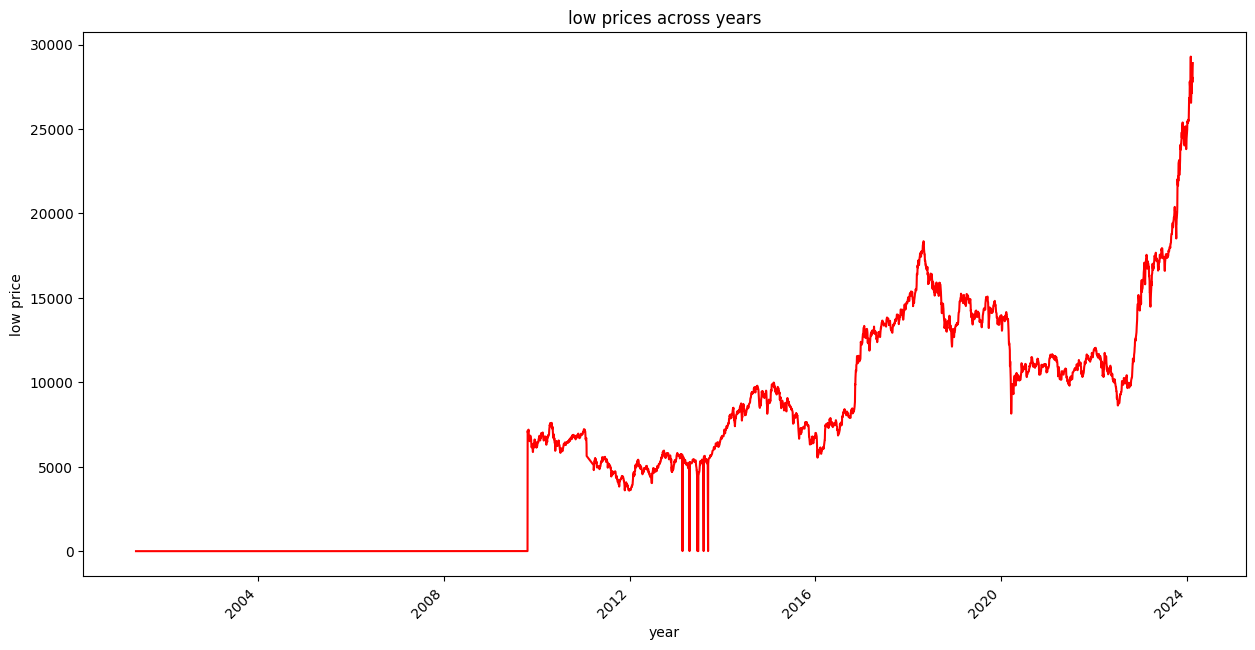

In [ ]:
low_time=df_merged.groupby('time')[['low']].sum()

#show the distibutions of low price across the years
low_time.plot( kind='line', rot=45, legend=None,
        title='low prices across years', xlabel='year',ylabel='low price' ,fontsize=10, figsize=(15,8),color='red')


<Axes: title={'center': 'high prices across years'}, xlabel='year', ylabel='high price'>

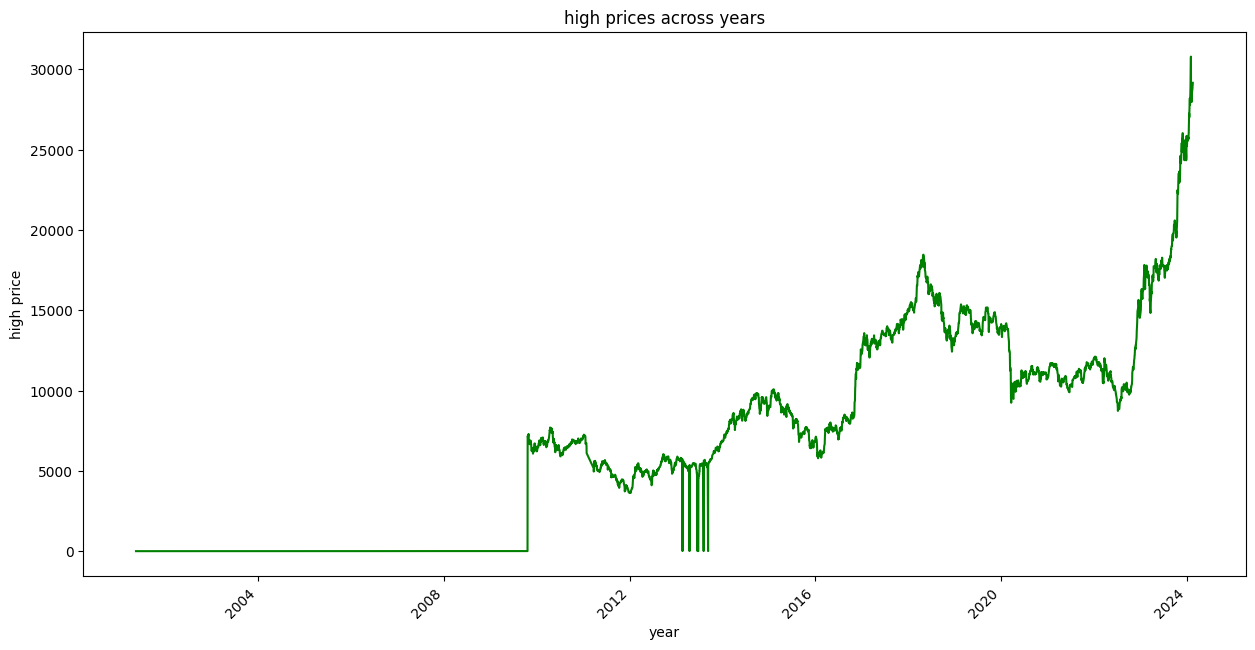

In [ ]:
high_time=df_merged.groupby('time')[['high']].sum()

#show the distibutions of high price across the years
high_time.plot( kind='line', rot=45, legend=None,
        title='high prices across years', xlabel='year',ylabel='high price' ,fontsize=10, figsize=(15,8),color='green')

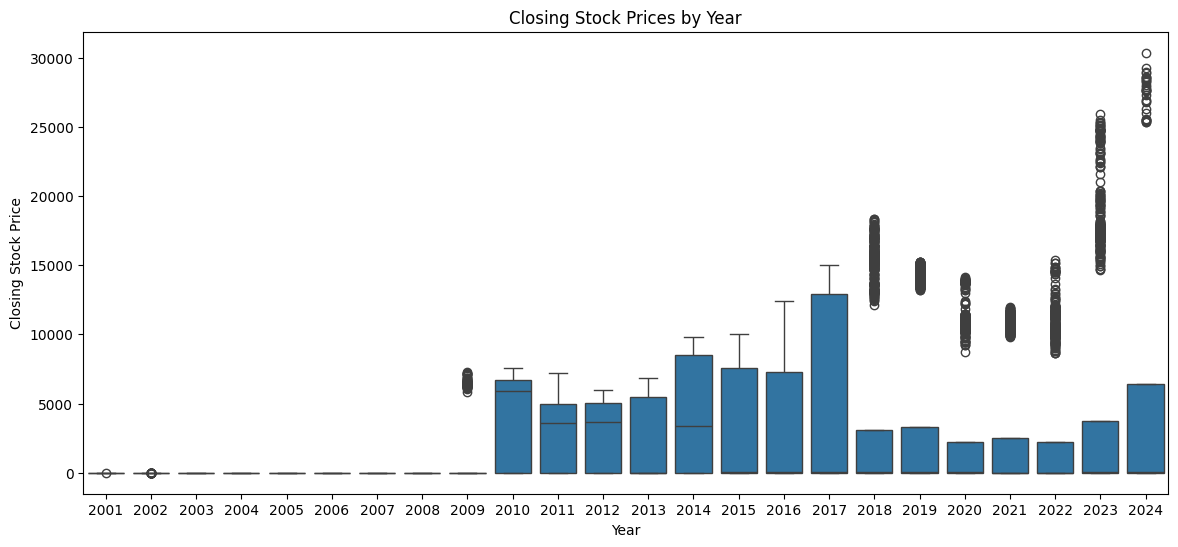

In [ ]:
df_merged['year'] = df_merged['time'].dt.year
plt.figure(figsize=(14,6))
sns.boxplot(x='year', y='close', data=df_merged)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.show()

In [ ]:
df_merged.set_index('time', inplace=True)
df_merged=df_merged.sort_index()


In [ ]:
df_merged

,open,high,low,close,year
time,,,,,
2001-05-15 07:00:00,0.839019,0.839019,0.827202,0.831220,2001
2001-05-16 07:00:00,0.827202,0.836419,0.823184,0.826020,2001
2001-05-17 07:00:00,0.827202,0.827202,0.820111,0.824366,2001
2001-05-20 07:00:00,0.815621,0.821293,0.815385,0.816566,2001
2001-05-21 07:00:00,0.813257,0.850836,0.809476,0.831456,2001
...,...,...,...,...,...
2024-02-14 08:00:00,3.810000,3.900000,3.800000,3.820000,2024
2024-02-15 08:00:00,28994.300000,29073.500000,28810.300000,28926.200000,2024
2024-02-15 08:00:00,81.990000,82.250000,80.800000,81.000000,2024


## 3. Predictive Analysis

In [157]:
"""
LSTMs are widely used for sequence prediction problems and have proven to be extremely effective.
The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not important

"""


# take the close column with the time
close_df=scaled_df[['time','close']]



del close_df['time']

close_stock=scaled_df[['time','close']]

#splitting the data into training and test

train_set = close_df.iloc[:10001,:].values
test_set = close_df.iloc[10001:,:].values


close_df



,close
0,0.013565
1,0.013276
2,0.013184
3,0.012749
4,0.013578
...,...
12635,0.102339
12636,0.102801
12637,0.111616
12638,0.111827


In [164]:
close_stock

,time,close
0,2001-05-15 07:00:00,0.013565
1,2001-05-16 07:00:00,0.013276
2,2001-05-17 07:00:00,0.013184
3,2001-05-20 07:00:00,0.012749
4,2001-05-21 07:00:00,0.013578
...,...,...
12635,2024-02-11 08:00:00,0.102339
12636,2024-02-12 08:00:00,0.102801
12637,2024-02-13 08:00:00,0.111616
12638,2024-02-14 08:00:00,0.111827


In [158]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [172]:
# reshape
time_step = 15
X_train, y_train = create_dataset(train_set, time_step)
X_test, y_test = create_dataset(test_set, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (9985, 15)
y_train:  (9985,)
X_test:  (2623, 15)
y_test (2623,)


In [173]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [174]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')



In [162]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_32 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_37 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_33 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_38 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_34 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_39 (LSTM)              (None, 50)              

In [175]:
# Fitting the RNN to the Training set
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=25,verbose=1)


Epoch 1/10
400/400 [==============================] - 27s 45ms/step - loss: 0.0082 - val_loss: 6.0247e-05
Epoch 2/10
400/400 [==============================] - 13s 33ms/step - loss: 0.0033 - val_loss: 1.3474e-04
Epoch 3/10
400/400 [==============================] - 13s 33ms/step - loss: 0.0030 - val_loss: 3.1109e-05
Epoch 4/10
400/400 [==============================] - 14s 35ms/step - loss: 0.0027 - val_loss: 5.4410e-05
Epoch 5/10
400/400 [==============================] - 14s 35ms/step - loss: 0.0024 - val_loss: 6.3451e-05
Epoch 6/10
400/400 [==============================] - 14s 34ms/step - loss: 0.0022 - val_loss: 3.3636e-05
Epoch 7/10
400/400 [==============================] - 14s 34ms/step - loss: 0.0021 - val_loss: 1.3139e-04
Epoch 8/10
400/400 [==============================] - 14s 35ms/step - loss: 0.0020 - val_loss: 2.3367e-04
Epoch 9/10
400/400 [==============================] - 15s 38ms/step - loss: 0.0018 - val_loss: 9.5354e-05
Epoch 10/10
400/400 [=========================

In [177]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

82/82 [==============================] - 1s 14ms/step


((9985, 1), (2623, 1))

In [178]:
 #back to original form

train_predict = min_max_scaler.inverse_transform(train_predict)
test_predict = min_max_scaler.inverse_transform(test_predict)
original_ytrain = min_max_scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = min_max_scaler.inverse_transform(y_test.reshape(-1,1))

In [179]:
test_predict.shape

(2623, 1)

In [180]:
original_ytest.shape

(2623, 1)

In [181]:
test_predict

array([[1.4839735],
       [1.4851813],
       [1.4838161],
       ...,
       [1.4961712],
       [1.5041562],
       [1.5140043]], dtype=float32)

In [182]:
original_ytest

array([[1.41342303],
       [1.42069579],
       [1.42310833],
       ...,
       [1.48387469],
       [1.57069708],
       [1.57277393]])

**Evaluation**

In [183]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9953907250127861
Test data R2 score: 0.9731198797347993


**Visualization to compare between orginal close and predicted**

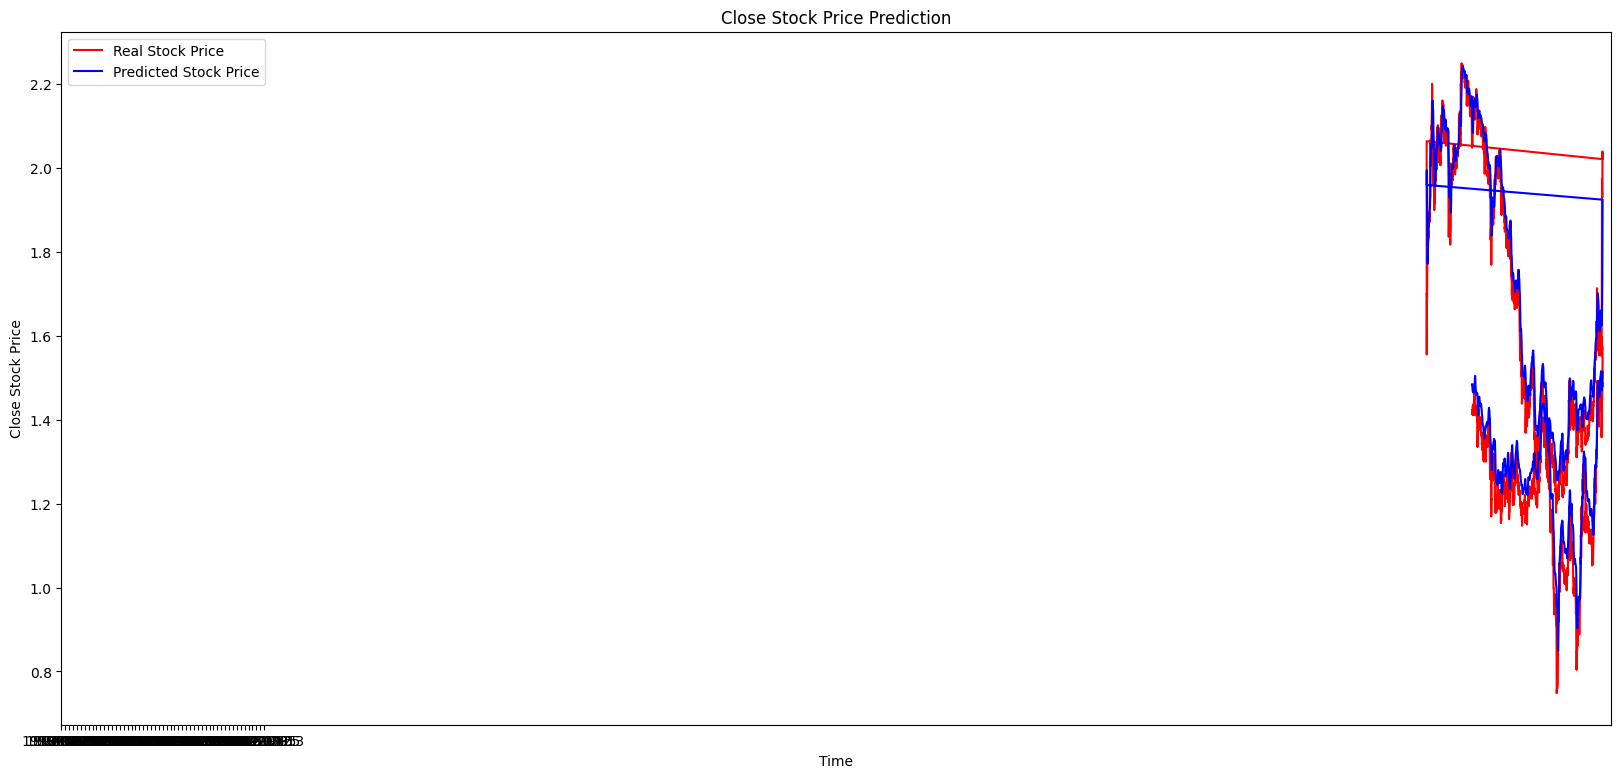

In [186]:
# Visualising the results
plt.figure(figsize=(20,9))
plt.plot(close_stock.loc[10017:, 'time'],original_ytest, color ='red', label = 'Real Stock Price')
plt.plot(close_stock.loc[10017:, 'time'],test_predict, color = 'blue', label = 'Predicted Stock Price')
plt.xticks(np.arange(0,2623,50))
plt.title('Close Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Stock Price')
plt.legend()
plt.show()


